# **Predicting Diabetes with SVM **

We’ll be using Machine Learning to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc. 

## Overview

We’ll be using Python and some of its popular data science related packages. First of all, we will import pandas to read our data from a CSV file and manipulate it for further use. We will also use numpy to convert out data into a format suitable to feed our classification model. We’ll use seaborn and matplotlib for visualizations. We will then import SVM algorithm from sklearn. This algorithm will help us build our classification model. Lastly, we will use joblib available in sklearn to save our model for future use.

**Importing the necessary mentioned packages **

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot, iplot, init_notebook_mode as py
import seaborn as sns
import plotly.graph_objs as go

#for standardising data
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split 

from sklearn import svm

from sklearn.metrics import accuracy_score

import joblib


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Data Collection and Analysis 

Reading our csv file 

In [ ]:
df=pd.read_csv('../input/docspot/datasets_228_482_diabetes.csv')

Checking data head and info



Let’s also make sure that our data is clean (has no null values, etc).


In [ ]:

print("-"*50)
print('Shape of the dataframe:',df.shape)
print("Number of records in train data set:",df.shape[0])
print("Information of the dataset:")
df.info()
print("-"*50)
print("First 5 records of the dataset:")


df.head()

print("-"*50)


Let's check Visually if there's any missing data 

In [ ]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    iplot(fig)
    

In [ ]:
# Plotting 
missing_plot(df, 'Outcome')

So there's no missing data 

In [ ]:
df.describe()

The following features have been provided to help us predict whether a person is diabetic or not:

* **Pregnancies**: Number of times pregnant

* **Glucose**: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

* **BloodPressure**: Diastolic blood pressure (mm Hg)

* **SkinThickness**: Triceps skin fold thickness (mm)

* **Insulin**: 2-Hour serum insulin (mu U/ml)

* **BMI**: Body mass index (weight in kg/(height in m)2)

* **DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

* **Age**: Age (years)

* **Outcome**: Class variable (0 if non-diabetic, 1 if diabetic)

Attributs Colleration 

In [ ]:
corr = df.corr()
corr

A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). 
This allows you to see which pairs have the highest correlation.

In [ ]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Class distribution

Class distribution
lets see the class distibution for 0 and 1
We have to predict whether a person has diabetes or not. Class variable (0 if non-diabetic, 1 if diabetic).

In [ ]:
print('Target of 0 is {} % of total'.format(round(df['Outcome'].value_counts()[0]/len(df['Outcome'])*100)))
print('Target of 1 is {} % of total'.format(round(df['Outcome'].value_counts()[1]/len(df['Outcome'])*100)))
x=df.Outcome.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

In [ ]:
df.groupby('Outcome').mean()

In [ ]:

# to plot a boxplot of
# age vs Outcome
plt.figure(figsize=(10, 8))
sns.boxplot(x='Outcome',
            y='Age',
            data=df)
plt.ylabel("Age", size=14)
plt.xlabel("Outcome", size=14)
plt.title("Average age of non-diabetic and diabetic people in the dataset", size=18)

## Prepare dataset

Separating the data and labels

In [ ]:
X=df.drop(columns='Outcome' , axis=1)
Y=df['Outcome']


In [ ]:
X.head()

In [ ]:
Y.head()

# Data Standardization 

In [ ]:
scaler=StandardScaler()

scaler.fit(X)
standardized_data=scaler.transform(X)

In [ ]:
print(standardized_data)

We can see that all tha values in a similare rang

In [ ]:
X=standardized_data
Y=df['Outcome']

In [ ]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

# Model 



## Overview on SVM 

### What's SVM ? 

SVM or Support Vector Machine is a linear model for classification and regression problems. 

It can solve linear and non-linear problems and work well for many practical problems. 
The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.
A support vector machine (SVM) is a **supervised** machine learning model that uses **classification** algorithms for two-group classification problems. 

After giving an SVM model sets of labeled training data for each category, they’re able to categorize new data.

### How Does SVM Work?
The basics of Support Vector Machines and how it works are best understood with a simple example. 

Let’s imagine we have two tags: red and blue, and our data has two features: x and y. We want a classifier that, given a pair of (x,y) coordinates, outputs if it’s either red or blue. We plot our already labeled training data on a plane:

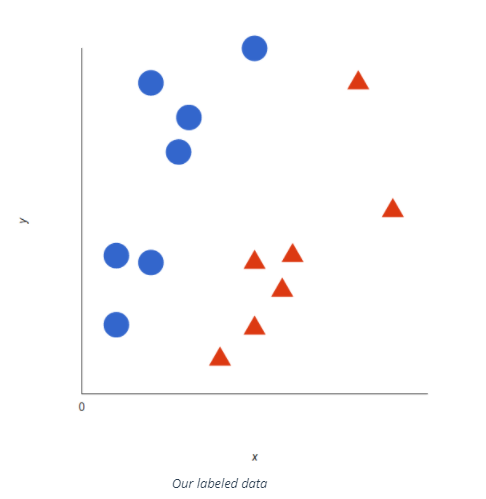]

A support vector machine takes these data points and outputs the **hyperplane** (which in two dimensions it’s simply a line) that best separates the tags. This line is the **decision boundar**y: anything that falls to one side of it we will classify as blue, and anything that falls to the other as red.

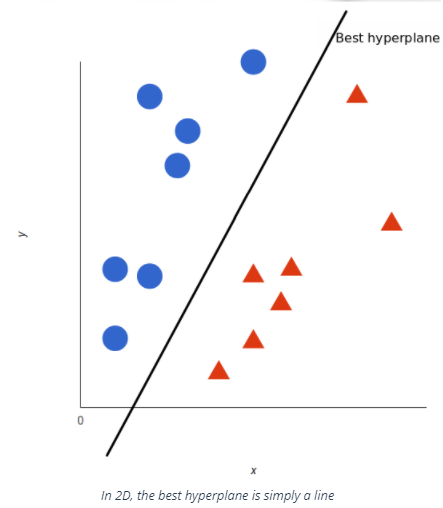

In [ ]:
classifier=svm.SVC(kernel='linear', random_state=42)

In [ ]:
# Fitting the model 

classifier.fit(X_train, Y_train)

# Evaluate the Model 


In [ ]:
# Accuracy score

X_train_prediction=classifier.predict(X_train)

training_accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy Score of the training Data : {} '.format(training_accuracy))

In [ ]:
# Accuracy score

X_test_prediction=classifier.predict(X_test)

test_accuracy=accuracy_score(X_test_prediction, Y_test)

print('Accuracy Score of the testing Data : {} '.format(test_accuracy))

### Making Predictions with the model
We will now use our unused data to see how predictions can be made. 

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)


# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [ ]:
# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)


In [ ]:
# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

**The Model correctly predict this person as diavetic which is correct**

## Interpreting the ML Model
To get a better sense of what is going on inside the logistic regression model, we can visualize how our model uses the different features and which features have greater effect.


In [ ]:
labels = list(df.drop('Outcome',1).columns)
labels

In [ ]:
coeff = list(classifier.coef_[0])
coeff

In [ ]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

Visualization of the weights in the SVM model corresponding to each of the feature variables


From the above figure, we can draw the following conclusions.
1. Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the model, specially glucose level and BMI. 

2. Blood pressure has a negative influence on the prediction, higher blood pressure is correlated with a person not being diabetic. 

## Saving the Model 

Now we will save our trained model for future use using joblib.

In [ ]:
#model saving and loading
joblib.dump(classifier, 'diabeteseModel.pkl')
diabetesLoadedModel = joblib.load('diabeteseModel.pkl')

To check whether we have saved the model properly or not, we will use our test data to check the accuracy of our saved model (we should observe no change in accuracy if we have saved it properly).

In [ ]:
#testing loaded model to make prediction
accuracyModel = diabetesLoadedModel.score(X_test,Y_test)
print("accuracy = ",accuracyModel * 100,"%")

In [ ]:
pip install hasy_tools

In [ ]:
from sklearn.ensemble import BaggingClassifier
import hasy_tools  # 
from sklearn.svm import LinearSVC


In [ ]:
svm = LinearSVC(random_state=42)
model = BaggingClassifier(base_estimator=svm, n_estimators=31, random_state=314)
# Fit
model.fit(X_train, Y_train)

In [ ]:
# Accuracy score

X_train_prediction=model.predict(X_train)

training_accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy Score of the training Data : {} '.format(training_accuracy))